# Aggregation and Grouping


- An essential piece of analysis of large data is efficient summarization: computing aggregations like sum(), mean(), median(), min(), and max(), in which a single number gives insight into the nature of a potentially large dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [39]:
planets = sns.load_dataset('planets')
planets.head(25)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100,77.40,2006
1,Radial Velocity,1,874.774000,2.210,56.95,2008
2,Radial Velocity,1,763.000000,2.600,19.84,2011
3,Radial Velocity,1,326.030000,19.400,110.62,2007
4,Radial Velocity,1,516.220000,10.500,119.47,2009
5,Radial Velocity,1,185.840000,4.800,76.39,2008
6,Radial Velocity,1,1773.400000,4.640,18.15,2002
7,Radial Velocity,1,798.500000,NaN,21.41,1996
8,Radial Velocity,1,993.300000,10.300,73.10,2008
9,Radial Velocity,2,452.800000,1.990,74.79,2010


In [8]:
planets.shape

(1035, 6)

In [10]:
randm=np.random.RandomState(42)

In [13]:
series=pd.Series(randm.rand(10))
series

0    0.020584
1    0.969910
2    0.832443
3    0.212339
4    0.181825
5    0.183405
6    0.304242
7    0.524756
8    0.431945
9    0.291229
dtype: float64

In [15]:
series.sum()

3.9526784084289623

In [17]:
series.mean()

0.3952678408428963

In [18]:
series.max()

0.9699098521619943

In [19]:
series.min()

0.020584494295802447

In [20]:
series.median()

0.2977356915787898

In [21]:
series.std()

0.30237062062086156

In [22]:
series.var()

0.091427992214645

- For a DataFrame, by default the aggregates return results within each column:

In [25]:
dataframe=pd.DataFrame({'A':randm.rand(20),"B":randm.rand(20)})

In [27]:
dataframe

,A,B
0,0.611853,0.122038
1,0.139494,0.495177
2,0.292145,0.034389
3,0.366362,0.909320
4,0.456070,0.258780
5,0.785176,0.662522
6,0.199674,0.311711
7,0.514234,0.520068
8,0.592415,0.546710
9,0.046450,0.184854


In [28]:
dataframe.mean()

A    0.454829
B    0.489971
dtype: float64

In [31]:
dataframe.mean(axis=0)

A    0.454829
B    0.489971
dtype: float64

In [32]:
dataframe.mean(axis=1)

0     0.366946
1     0.317335
2     0.163267
3     0.637841
4     0.357425
5     0.723849
6     0.255692
7     0.517151
8     0.569562
9     0.115652
10    0.788565
11    0.472828
12    0.502275
13    0.921856
14    0.781766
15    0.865136
16    0.196553
17    0.146827
18    0.364730
19    0.382741
dtype: float64

In [33]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


- This can be a useful way to begin understanding the overall properties of a dataset.

- For example, we see in the year column that although exoplanets were discovered as far back as 1989, half of all known expolanets were not discovered until 2010 or after.

- This is largely thanks to the Kepler mission, which is a space-based telescope specifically designed for finding eclipsing planets around other stars.

- The following table summarizes some other built-in Pandas aggregations:

Aggregation	Description:

- count()  :	Total number of items

- first(), last()	: First and last item

- mean(), median():	Mean and median

- min(), max():	Minimum and maximum

- std(), var():	Standard deviation and variance

- mad():	Mean absolute deviation

- prod():	Product of all items

- sum():	Sum of all items

- These are all methods of DataFrame and Series objects.

# GroupBy: Split, Apply, Combine:

- Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called groupby operation. The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: split, apply, combine.

## Split, apply, combine

- A canonical example of this split-apply-combine operation, where the "apply" is a summation aggregation, is illustrated in this figure:


- The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.

- The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.

- The combine step merges the results of these operations into an output array.


- 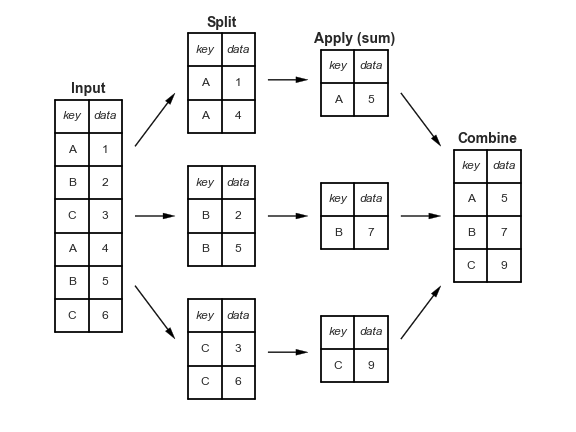

In [34]:
planets.groupby('method')

- Notice that what is returned is not a set of DataFrames, but a DataFrameGroupBy object. This object is where the magic is: you can think of it as a special view of the DataFrame, which is poised to dig into the groups but does no actual computation until the aggregation is applied. This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

- To produce a result, we can apply an aggregate to this DataFrameGroupBy object, which will perform the appropriate apply/combine steps to produce the desired result:

In [36]:
planets.groupby('method')['orbital_period'].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

## Dispatch methods

- Through some Python class magic, any method not explicitly implemented by the GroupBy object will be passed through and called on the groups, whether they are DataFrame or Series objects. For example, you can use the describe() method of DataFrames to perform a set of aggregations that describe each group in the data:

In [38]:
planets.groupby('method')['year'].describe().unstack

<bound method DataFrame.unstack of                                count         mean       std     min      25%  \
method                                                                         
Astrometry                       2.0  2011.500000  2.121320  2010.0  2010.75   
Eclipse Timing Variations        9.0  2010.000000  1.414214  2008.0  2009.00   
Imaging                         38.0  2009.131579  2.781901  2004.0  2008.00   
Microlensing                    23.0  2009.782609  2.859697  2004.0  2008.00   
Orbital Brightness Modulation    3.0  2011.666667  1.154701  2011.0  2011.00   
Pulsar Timing                    5.0  1998.400000  8.384510  1992.0  1992.00   
Pulsation Timing Variations      1.0  2007.000000       NaN  2007.0  2007.00   
Radial Velocity                553.0  2007.518987  4.249052  1989.0  2005.00   
Transit                        397.0  2011.236776  2.077867  2002.0  2010.00   
Transit Timing Variations        4.0  2012.500000  1.290994  2011.0  2011.75   

    

Looking at this table helps us to better understand the data: for example, the vast majority of planets have been discovered by the Radial Velocity and Transit methods, though the latter only became common (due to new, more accurate telescopes) in the last decade. The newest methods seem to be Transit Timing Variation and Orbital Brightness Modulation, which were not used to discover a new planet until 2011.

# Aggregate, filter, transform, apply

In [41]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df


,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


We're now familiar with GroupBy aggregations with sum(), median(), and the like, but the aggregate() method allows for even more flexibility. It can take a string, a function, or a list thereof, and compute all the aggregates at once. Here is a quick example combining all these:

In [44]:
df.groupby("key").aggregate([max,min,np.median])

data1            data2           
      max min median   max min median
key                                  
A       3   0    1.5     5   3    4.0
B       4   1    2.5     7   0    3.5
C       5   2    3.5     9   3    6.0

In [48]:
planets['year']//10*10

0       2000
1       2000
2       2010
3       2000
4       2000
        ... 
1030    2000
1031    2000
1032    2000
1033    2000
1034    2000
Name: year, Length: 1035, dtype: int64

In [47]:
planets['year']

0       2006
1       2008
2       2011
3       2007
4       2009
        ... 
1030    2006
1031    2007
1032    2007
1033    2008
1034    2008
Name: year, Length: 1035, dtype: int64

In [49]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [50]:
phone_data=pd.read_csv('phone_data.csv')

In [51]:
phone_data.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [52]:
phone_data.dtypes

index             int64
date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [53]:
phone_data['date']=pd.to_datetime(phone_data['date'])


In [60]:
import datetime as dt
phone_data['month']=pd.to_datetime(phone_data['month'])
phone_data['month'].dt.month

0      11
1      11
2      11
3      11
4      11
       ..
825     3
826     3
827     3
828     3
829     3
Name: month, Length: 830, dtype: int64

In [61]:
phone_data.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month           datetime64[ns]
network                 object
network_type            object
dtype: object

In [63]:
phone_data.groupby(['month']).groups.keys()


dict_keys([Timestamp('2014-11-01 00:00:00'), Timestamp('2014-12-01 00:00:00'), Timestamp('2015-01-01 00:00:00'), Timestamp('2015-02-01 00:00:00'), Timestamp('2015-03-01 00:00:00')])

The groupby() function returns a GroupBy object, but essentially describes how the rows of the original data set has been split. the GroupBy object .groups variable is a dictionary whose keys are the computed unique groups and corresponding values being the axis labels belonging to each group.

1.Get the first entry for each month

In [67]:
phone_data.groupby('month').first()

,index,date,duration,item,network,network_type
month,,,,,,
2014-11-01,0,2014-10-15 06:58:00,34.429,data,data,data
2014-12-01,228,2014-11-13 06:58:00,34.429,data,data,data
2015-01-01,381,2014-12-13 06:58:00,34.429,data,data,data
2015-02-01,577,2015-01-13 06:58:00,34.429,data,data,data
2015-03-01,729,2015-12-02 20:15:00,69.000,call,landline,landline


2. Get the sum of the durations per month

In [68]:
phone_data.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11-01,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11-01,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11-01,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11-01,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11-01,Tesco,mobile


In [71]:
phone_data.groupby('month')[['duration']].sum()

,duration
month,
2014-11-01,26639.441
2014-12-01,14641.870
2015-01-01,18223.299
2015-02-01,15522.299
2015-03-01,22750.441


3. Get the number of dates / entries in each month

In [73]:
phone_data.groupby('month')[['date']].count()

,date
month,
2014-11-01,230
2014-12-01,157
2015-01-01,205
2015-02-01,137
2015-03-01,101


4. What is the sum of durations, for calls only, to each network


In [75]:
phone_data.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11-01,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11-01,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11-01,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11-01,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11-01,Tesco,mobile


In [83]:
phone_data[phone_data['item']=='call'].groupby('network')['duration'].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [85]:
phone_data[phone_data['item']=='call']

,index,date,duration,item,month,network,network_type
1,1,2014-10-15 06:58:00,13.0,call,2014-11-01,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.0,call,2014-11-01,Meteor,mobile
3,3,2014-10-15 14:48:00,4.0,call,2014-11-01,Tesco,mobile
4,4,2014-10-15 17:27:00,4.0,call,2014-11-01,Tesco,mobile
5,5,2014-10-15 18:55:00,4.0,call,2014-11-01,Tesco,mobile
...,...,...,...,...,...,...,...
807,807,2015-03-03 10:12:00,745.0,call,2015-03-01,Vodafone,mobile
808,808,2015-03-03 10:27:00,57.0,call,2015-03-01,Vodafone,mobile
809,809,2015-03-03 14:34:00,1325.0,call,2015-03-01,Vodafone,mobile
810,810,2015-03-03 18:36:00,768.0,call,2015-03-01,Three,mobile


5. How many calls, sms, and data entries are in each month?


In [86]:
phone_data['item'].value_counts()

call    388
sms     292
data    150
Name: item, dtype: int64

In [98]:
phone_data.groupby(['month','item'])['item'].count()

month       item
2014-11-01  call    107
            data     29
            sms      94
2014-12-01  call     79
            data     30
            sms      48
2015-01-01  call     88
            data     31
            sms      86
2015-02-01  call     67
            data     31
            sms      39
2015-03-01  call     47
            data     29
            sms      25
Name: item, dtype: int64

6.  How many calls, texts, and data are sent per month, split by network_type?

In [101]:
phone_data.groupby(['month','item','network_type'])["network_type"].count()

month       item  network_type
2014-11-01  call  landline         5
                  mobile          96
                  voicemail        6
            data  data            29
            sms   mobile          93
                  special          1
2014-12-01  call  landline         7
                  mobile          64
                  voicemail        8
            data  data            30
            sms   mobile          44
                  world            4
2015-01-01  call  landline        11
                  mobile          74
                  voicemail        3
            data  data            31
            sms   mobile          86
2015-02-01  call  landline         8
                  mobile          53
                  voicemail        6
            data  data            31
            sms   mobile          37
                  special          2
2015-03-01  call  landline        11
                  mobile          32
                  voicemail        4
       

In [103]:
phone_data.groupby('month', as_index=False).agg({"duration": "sum"})

,month,duration
0,2014-11-01,26639.441
1,2014-12-01,14641.870
2,2015-01-01,18223.299
3,2015-02-01,15522.299
4,2015-03-01,22750.441


In [104]:
phone_data.groupby('month').agg({"duration": "sum"})

,duration
month,
2014-11-01,26639.441
2014-12-01,14641.870
2015-01-01,18223.299
2015-02-01,15522.299
2015-03-01,22750.441


In [107]:
phone_data.groupby(['month','duration']).sum()

index
month      duration       
2014-11-01 1.0       12587
           3.0         995
           4.0        1120
           5.0         445
           6.0         233
...                    ...
2015-03-01 745.0       807
           768.0       810
           1325.0      809
           2328.0      742
           10528.0     816

[324 rows x 1 columns]

6. Group the data frame by month and item and extract a number of stats from each group

In [111]:
phone_data.groupby(['month','item']).aggregate({'duration':sum ,"item": "count" ,'network':"first"})

duration  item    network
month      item                            
2014-11-01 call  25547.000   107   Vodafone
           data    998.441    29       data
           sms      94.000    94     Meteor
2014-12-01 call  13561.000    79  voicemail
           data   1032.870    30       data
           sms      48.000    48   Vodafone
2015-01-01 call  17070.000    88      Three
           data   1067.299    31       data
           sms      86.000    86      Three
2015-02-01 call  14416.000    67      Three
           data   1067.299    31       data
           sms      39.000    39    special
2015-03-01 call  21727.000    47   landline
           data    998.441    29       data
           sms      25.000    25   Vodafone

In [117]:
phone_data[phone_data['item'] == 'call']

,index,date,duration,item,month,network,network_type
1,1,2014-10-15 06:58:00,13.0,call,2014-11-01,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.0,call,2014-11-01,Meteor,mobile
3,3,2014-10-15 14:48:00,4.0,call,2014-11-01,Tesco,mobile
4,4,2014-10-15 17:27:00,4.0,call,2014-11-01,Tesco,mobile
5,5,2014-10-15 18:55:00,4.0,call,2014-11-01,Tesco,mobile
...,...,...,...,...,...,...,...
807,807,2015-03-03 10:12:00,745.0,call,2015-03-01,Vodafone,mobile
808,808,2015-03-03 10:27:00,57.0,call,2015-03-01,Vodafone,mobile
809,809,2015-03-03 14:34:00,1325.0,call,2015-03-01,Vodafone,mobile
810,810,2015-03-03 18:36:00,768.0,call,2015-03-01,Three,mobile


In [115]:
phone_data[phone_data['item'] == 'call'].groupby('month').agg(
    # Get max of the duration column for each group
    max_duration=('duration', max),
    # Get min of the duration column for each group
    min_duration=('duration', min),
    # Get sum of the duration column for each group
    total_duration=('duration', sum))

,max_duration,min_duration,total_duration
month,,,
2014-11-01,1940.0,1.0,25547.0
2014-12-01,2120.0,2.0,13561.0
2015-01-01,1859.0,2.0,17070.0
2015-02-01,1863.0,1.0,14416.0
2015-03-01,10528.0,2.0,21727.0


In [2]:

import pandas as pd
bigmart=pd.read_csv("train_bigmart.csv")

In [3]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
import datetime as dt
bigmart['Outlet_Establishment_Year']=pd.to_datetime(bigmart['Outlet_Establishment_Year'])
bigmart['Outlet_Establishment_Year']=bigmart['Outlet_Establishment_Year'].dt.year

In [6]:
bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1970,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1970,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1970,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1970,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,1970,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,1970,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,1970,Medium,Tier 3,Supermarket Type2,1845.5976


In [17]:

bigmart.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

In [26]:
obj=bigmart.groupby('Outlet_Location_Type').groups

In [29]:
import numpy as np
bigmart.groupby(['Outlet_Location_Type','Outlet_Establishment_Year'],as_index=False).agg({'Outlet_Size':pd.Series.mode,'Item_Outlet_Sales':np.mean})


,Outlet_Location_Type,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
0,Tier 1,1970,Small,1876.909159
1,Tier 2,1970,Small,2323.990559
2,Tier 3,1970,Medium,2279.627651


In [32]:
bigmart['Item_Weight'] = bigmart.groupby(['Item_Fat_Content','Item_Type'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
bigmart['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

1. 1. Write a Pandas program to split the following dataframe into groups based on school code. Also check the type of GroupBy object.

school class            name date_Of_Birth   age  height  weight  address
S1   s001     V  Alberto Franco     15/05/2002   12    173      35  street1
S2   s002     V    Gino Mcneill     17/05/2002   12    192      32  street2
S3   s003    VI     Ryan Parkes     16/02/1999   13    186      33  street3
S4   s001    VI    Eesha Hinton     25/09/1998   13    167      30  street1
S5   s002     V    Gino Mcneill     11/05/2002   14    151      31  street2
S6   s004    VI    David Parkes     15/09/1997   12    159      32  street4

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
school_info=pd.DataFrame({'school_code':['s001','s002','s003','s001','s002','s004'],
                            'class':['V','V','VI','VI','V','VI'],
                         'name':['Alberto Franco',' Gino Mcneill','Ryan Parkes','Eesha Hinton','Gino Mcneill','David Parkes'],
                         'date_Of_Birth':['15/05/2002','17/05/2002','16/02/1999','25/09/1998','11/05/2002','15/09/1997'],
                         'age':[12,12,13,13,14,12],
                         'height':[173,192,186,167,151,159],
                         'weight':[35,32,33,30,31,32],
                         'address':['street1','street2','street3','street1','street','street4']},
                         index=['S1','S2','S3','S4','S5','S6'])

In [3]:
school_info

,school_code,class,name,date_Of_Birth,age,height,weight,address
S1,s001,V,Alberto Franco,15/05/2002,12,173,35,street1
S2,s002,V,Gino Mcneill,17/05/2002,12,192,32,street2
S3,s003,VI,Ryan Parkes,16/02/1999,13,186,33,street3
S4,s001,VI,Eesha Hinton,25/09/1998,13,167,30,street1
S5,s002,V,Gino Mcneill,11/05/2002,14,151,31,street
S6,s004,VI,David Parkes,15/09/1997,12,159,32,street4


In [4]:
school_info.dtypes

school_code      object
class            object
name             object
date_Of_Birth    object
age               int64
height            int64
weight            int64
address          object
dtype: object

In [5]:
school_info['date_Of_Birth']=pd.to_datetime(school_info['date_Of_Birth'])

In [6]:
school_info.dtypes

school_code              object
class                    object
name                     object
date_Of_Birth    datetime64[ns]
age                       int64
height                    int64
weight                    int64
address                  object
dtype: object

2, Write a Pandas program to split the  dataframe by school code and get mean, min, and max value of age for each school.

In [9]:
school_info.groupby('school_code').agg({"age":[np.mean,min,max]})

age        
             mean min max
school_code              
s001         12.5  12  13
s002         13.0  12  14
s003         13.0  13  13
s004         12.0  12  12